## Data Visualization & Communication

Student: Charles Franklin Jahn 2020315

Lecturer: Sam Weiss

CCT College Dublin

BSc (Hons) in Computing in IT - 4nd Year

05.11.2023

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set()

import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Fortune500.csv")

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Generate a plot that details the 5 top Companies by Revenue for each Decade. E.g., Top 5 for 1950-1959, 1960-1969, etc. This can be either static or interactive.

In [4]:
# Convert the 'Year' column to a datetime for easier manipulation
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
# Extract the decade from the 'Year' column
df['Decade'] = df['Year'].dt.year // 10 * 10
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
0,1955-01-01,1,General Motors,9823.5,806,1950
1,1955-01-01,2,Exxon Mobil,5661.4,584.8,1950
2,1955-01-01,3,U.S. Steel,3250.4,195.4,1950
3,1955-01-01,4,General Electric,2959.1,212.6,1950
4,1955-01-01,5,Esmark,2510.8,19.1,1950


In [5]:
#Create a new data frame grouping by company, and summing the Revenue in each expeficic decade
companies_by_decade = df.groupby(['Decade', 'Company'])['Revenue (in millions)'].sum().reset_index()

#Overwriting the data frame and sorting the revenue in Ascening for each decade
companies_by_decade = companies_by_decade.sort_values(['Decade', 'Revenue (in millions)'], ascending=[True, False])

#Create a new data frame with the top 5 of each decade 
top_companies_by_decade = companies_by_decade.groupby('Decade').head(5)

In [7]:
top_companies_by_decade.head()

,Decade,Company,Revenue (in millions)
254,1950,General Motors,53575.0
217,1950,Exxon Mobil,34434.5
231,1950,Ford Motor,20142.6
571,1950,U.S. Steel,19463.0
250,1950,General Electric,18601.0


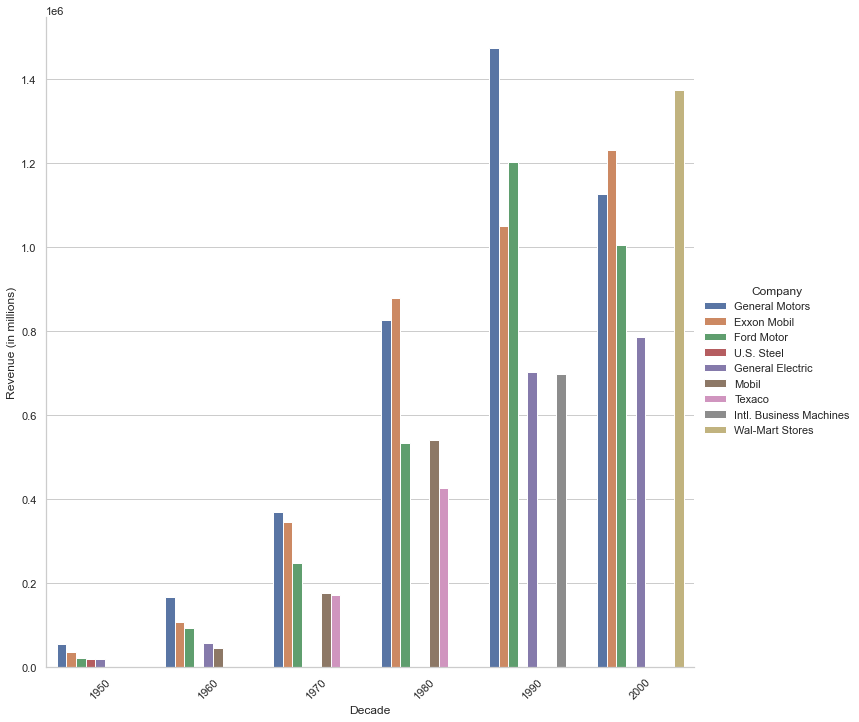

In [15]:
sns.set(style="whitegrid")
sns.catplot(x="Decade",y="Revenue (in millions)", data=top_companies_by_decade, kind="bar",hue = "Company",height = 10, aspect=1)
plt.xticks(rotation = 45);